## In linear regression, target must continuous variable

example of a regression problem: A bike share company using time and weather data to predict the number of bikes being rented at any given hour.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
boston = pd.read_csv('boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
#Get numpy arrays from dataframe for target and features:

#Drop target:
X = boston.drop('medv', axis=1).values

#Keep only target:
y = boston['medv'].values

## Predict house value from a single feature

In [23]:
#Get the rooms columns as a numpy array
X_rooms = X[:, 6]

In [24]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [25]:
a

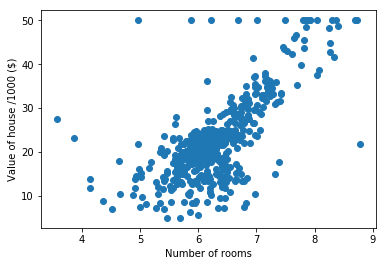

In [26]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

## Fitting a regression model

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [28]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

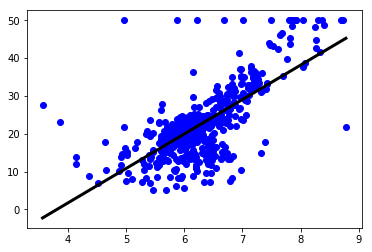

In [33]:
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
        color = 'black', linewidth=3)
plt.show()

y = ax + b <br />
y is target<br />
x is single feature<br />
a, b = parameters of model<br />
define an error function for any given line<br />
choose line that minimizes loss<br />
minimize sum of square of residuals = ordinary least squares<br />
for two features: <br />
y = a1x1 + a2x2 + b <br />
Need to specify 3 variables<br />
R squared quantifies amount of variance in the target variable that is predicted from the feature variables (reg_all.score())

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

prediction_space

## Train/test split for regression

In [40]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7051609808903437
Root Mean Squared Error: 4.68714924106903


## Cross-validation </br>

Model performance is dependent on the way data is split and can be unrepresentative of the model's ability to generalize </br>

Splits data into 5 groups, uses the 1 group as a test set, and fits model on remaining 4 groups, predict on test set, and comput metric of interest, do this with 2, 3, etc. groups </br>

You end up with 5 values of R^2 - from which you can compute mean, median, 95% confidence interval </br>

More folds = more computationally expensive

In [37]:
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[ 0.57280576  0.72459569  0.59122862  0.08126754 -0.20963498]


In [38]:
cv_results.mean()

0.35205252566286543

## Regularized Regression

Linear regression minimizes a loss function 

It chooses a coefficient for each feature variable 

Large coefficients can lead to overfitting 

It's common practice to alter loss function so it penalizes for large coefficients -> Regularization

Alpha: parameter we need to choose 

Similar to choosing k in k-NN

Alpha controls model complexity

Alpha = 0: We get back OLS (can lead to overfitting)

Very high alpha: can lead to underfitting

### Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train, y_train)

ridge.predict(X_test)

ridge.score(X_test, y_test)

0.6977072273529515

### Lasso Regression

Can be used to select important features of a dataset

Shrinks the coefficients of less important features to 0

In [45]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.5950229653464187

### Lasso for feature selection in scikit-learn

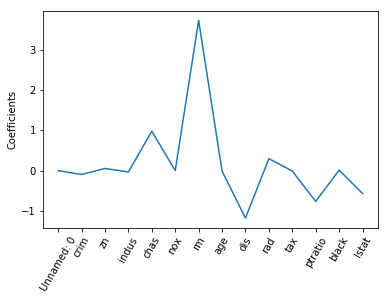

In [48]:
from sklearn.linear_model import Lasso

names = boston.drop('medv', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')

plt.show()

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

In [50]:
#np.logspace(-4, 0, 50)

Problems with only using accuracy as a measure of how good a model is:

Class imbalance example: Emails
    
spam classification: 99% of emails real, 1% spam
        
could build a classifier that doesn't detect any spam and it         would be 99% accurate; fails at original purpose
    
class imbalance: class of emails contains way more instances than     class of spam

### Accuracy: true pos + true neg / (true pos + true neg + false pos + false neg)

### Precision: true pos / (true pos + false pos)

### Recall: true pos / (true pos + false pos)

### F1 score: 2 x (precision x recall / precision + recall)

High precision: not many emails predicted as spam

High recall: predicted most spam emails correctly